In [1]:
import pandas as pd

In [3]:
train = pd.read_csv("./data/titanic/train.csv")
test = pd.read_csv("./data/titanic/test.csv")

In [6]:
# 데이터 탐색
print(train.shape)
print(test.shape)

#결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

(891, 12)
(418, 11)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
from sklearn.neighbors import KNeighborsClassifier  

In [14]:
# 변수 선택
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch']
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [21]:
# 학습과 예측, 제출
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:15]
sub = pd.read_csv("./data/titanic/sample_submission.csv")
sub.head(10)

sub['Survived'] = pred
sub.to_csv("./data/titanic/knn_first_model.csv", index=False)

### 로지스틱 모델

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
pred2[0:15]

C:\Users\ktm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [26]:
sub = pd.read_csv("./data/titanic/sample_submission.csv")
sub.head(10)

sub['Survived'] = pred2
pred[0:30]
pred2[0:30]
sub.to_csv("./data/titanic/log_first_model.csv", index=False)

### 의사결정트리 모델

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
pred3[0:15]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
sub = pd.read_csv("./data/titanic/sample_submission.csv")
sub.head(10)

sub['Survived'] = pred3
pred3[0:30]
sub.to_csv('./data/titanic/tree_first_model.csv', index=False)

###### 결측치 확인 - 의사결정트리

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

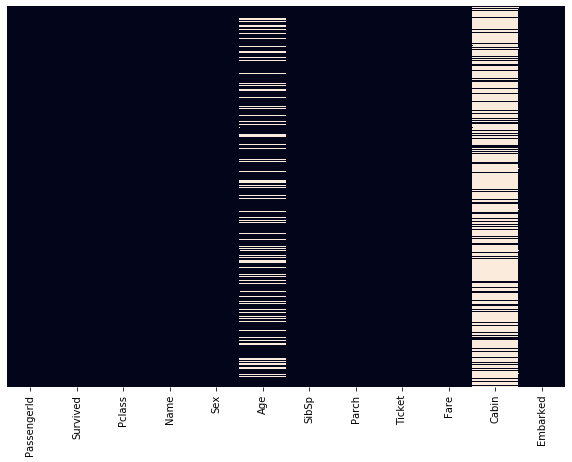

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

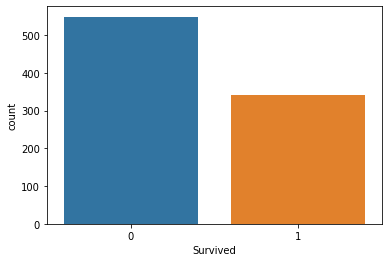

In [35]:
sns.countplot(x='Survived', data=train)

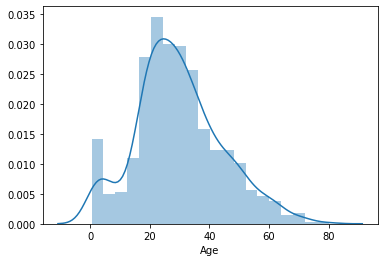

In [36]:
sns.distplot(train['Age'].dropna())

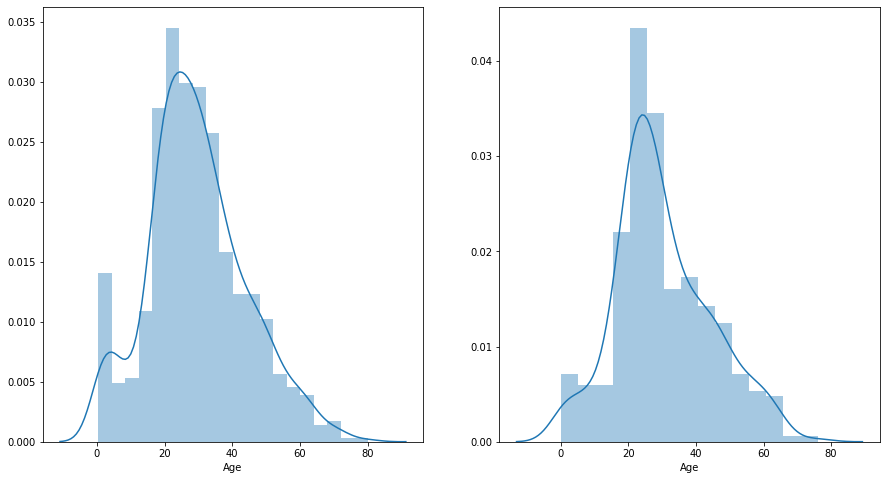

In [38]:
f, ax = plt.subplots(1,2,figsize=(15,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), ax=ax[0])
sns.distplot(test['Age'].dropna(), ax=ax[1])

In [40]:
## 결측치 처리
# 나이를 결측치 처리. 나이는 평균값으로 

train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [41]:
# Embarked - 범주형
val_Embarked = train['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
train['Embarked'] = train['Embarked'].fillna('S')
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [46]:
## 3번째 결측치 처리
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [48]:
# 문자열 숫자로 바꿔준다. (컴퓨터가 문자를 그대로 이해를 못함)
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int) 
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [49]:
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [51]:
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [52]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
pred4[0:15]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [53]:
sub = pd.read_csv("./data/titanic/sample_submission.csv")
sub.head(10)

sub['Survived'] = pred4
pred4[0:30]
sub.to_csv('./data/titanic/tree_second_model.csv', index=False)

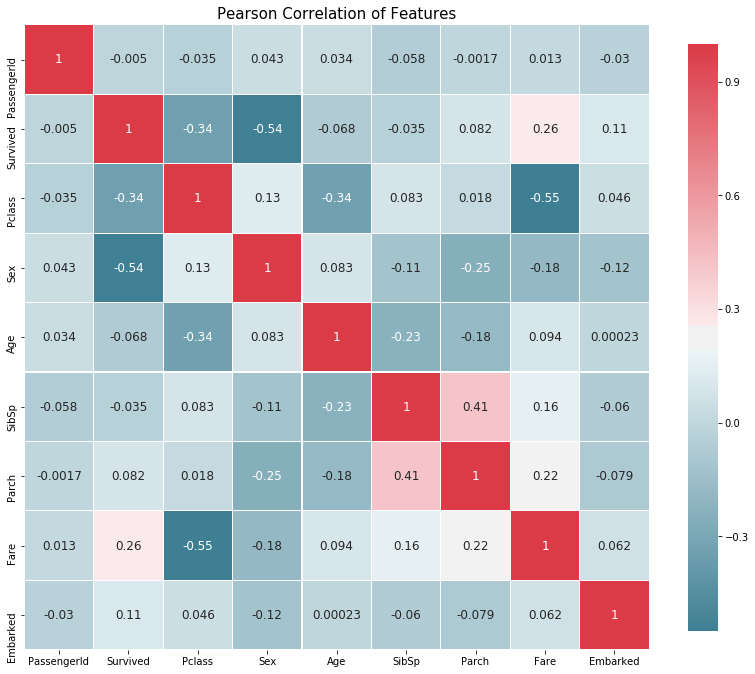

In [54]:
## 중요한 변수확인
                 
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)


### RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
pred5[0:15]

C:\Users\ktm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [63]:
sel1 = ['Pclass', 'Sex', 'Fare']
X_train = train[sel1]
y_train = train['Survived']
X_test = test[sel1]

In [64]:
sub = pd.read_csv("./data/titanic/sample_submission.csv")
sub.head(10)

sub['Survived'] = pred5
sub.to_csv("./data/titanic/random_model.csv", index=False)

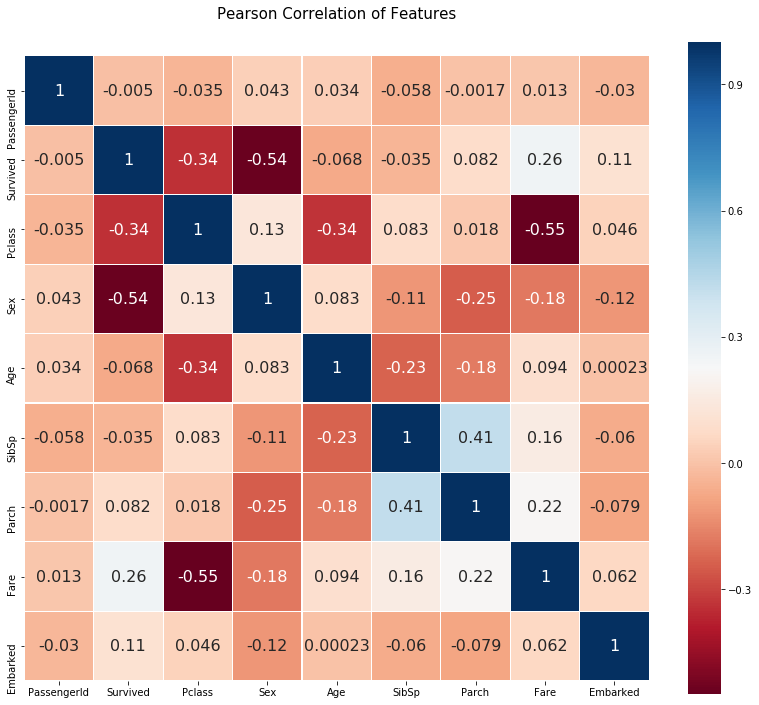

In [65]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})